## The goal is to make a function that fits a constant value to a ton of independent measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
filename = 'const_data.txt'
const_data = np.loadtxt(filename)

Xs, Ys, sigs = const_data.T
# xs are indep variable
# ys are the measurement
# sigs are the stdev for each measurement

(984.5856644899372, 1015.2536685245732)

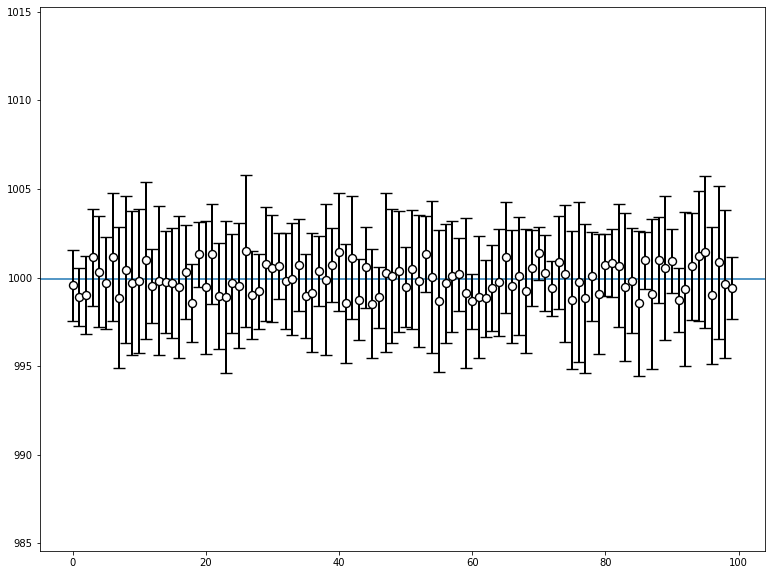

In [3]:
def chi2_const(c):
    # chi-squred GOF for constant c
    return np.sum(((Ys - c)/sigs)**2)

def min_chi2_const():
    # returns the parameters required for minimum chisq
    c_guess = .2
    
    val_guess = optimize.minimize(chi2_const, c_guess, method = 'nelder-mead') 
    
    return val_guess.x

plt.figure(figsize=(13,10))

# error plot of all the measurements
plt.errorbar(Xs, Ys, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)	

# add the line of best fit
plt.axhline(min_chi2_const()[0])

# expand the y-limits to make the plot look prettier
plt.ylim([np.mean(Ys)-5*np.mean(sigs),np.mean(Ys)+5*np.mean(sigs)]) # makes a comfy display for y-values